# Project 3: Temperatures Dashboard

In this project, we will analyze a dataset with temperatures from 10 cities around the world extracting some interesting insights and developing two charts about them. We will be using once more Pandas and Matplotlib, but this time we will convert a column into timestamp date type, so we will be able to do some time sereis analysis and plots.

Data extracted from: https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities (with some cleaning and modifications).


### Project Tasks:

- `3.1.` Load the dataset from the defined data_path and display the first 5 rows.

- `3.2.` Create a new column called `AvgTemperatureCelsius` that contains the temperature in Celsius degrees.

- `3.3.` How many different countries are there? Provide a list of them.

- `3.4.` What is the minimum and maximum timestamps?

- `3.5.` What is the global minimum and maximum temperature? Find the city and the date of each of them.

- `3.6.` For a given city and a range of dates (start and end):
  - Make a line plot with the temperature reads of that city during the selected time period, the x axis has to be the timestamp column.
  - Make a histogram of the temperature reads of that city during the selected time period.
  - Make sure that all plots include a title, axis labels and a legend.

- `3.7.` Now repeat the previous question but for a list of cities instead of a single one:
  - Make a line plot with the temperature reads of the cities in the list, for the selected time period, every city has to be a different line with a different color, the x axis has to be the timestamp column.
  - Make a histogram of the temperature reads of a list of selected cities, for the selected time period, every city has to be its own distribution with a different color.
  - Make sure that all plots include a title, axis labels and a legend.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Ex 3.1: Load the dataset from the defined data_path and display the first 5 rows.

data_path = "/Users/edenschreurs/Documents/IPL EAE code/eae_ipld_project_Eden/data/cities_temperatures.csv"

temps_df = pd.read_csv(data_path)

temps_df.head(5)

,Country,City,AvgTemperatureFahrenheit,Date,Month,Year
0,Argentina,Buenos Aires,79.5,2000-01-01,1,2000
1,Argentina,Buenos Aires,78.8,2000-01-02,1,2000
2,Argentina,Buenos Aires,74.3,2000-01-03,1,2000
3,Argentina,Buenos Aires,79.0,2000-01-04,1,2000
4,Argentina,Buenos Aires,77.1,2000-01-05,1,2000


In [4]:
# Converting the date column to datetime date format in order to be able to analyze better the time series and plot it
temps_df["Date"] = pd.to_datetime(temps_df["Date"]).dt.date

In [27]:
# Ex 3.2: Create a new column called `AvgTemperatureCelsius` that contains the temperature in Celsius degrees.

temps_df["AvgTemperatureCelsius"] = temps_df["AvgTemperatureFahrenheit"].apply(lambda x: (5/9) * (x - 32))

temps_df.head(5)

,Country,City,AvgTemperatureFahrenheit,Date,Month,Year,AvgTemperatureCelsius
0,Argentina,Buenos Aires,79.5,2000-01-01,1,2000,26.388889
1,Argentina,Buenos Aires,78.8,2000-01-02,1,2000,26.000000
2,Argentina,Buenos Aires,74.3,2000-01-03,1,2000,23.500000
3,Argentina,Buenos Aires,79.0,2000-01-04,1,2000,26.111111
4,Argentina,Buenos Aires,77.1,2000-01-05,1,2000,25.055556


In [6]:
# Ex 3.3: How many different cities are there? Provide a list of them.

unique_cities_list = temps_df['City'].unique()

print(f"There are {len(unique_cities_list)} cities with temperature data which are the following: {list(unique_cities_list)}")

There are 10 cities with temperature data which are the following: ['Buenos Aires', 'Canberra', 'Bogota', 'Cairo', 'Munich', 'Calcutta', 'Tokyo', 'Dakar', 'Capetown', 'Washington']


In [7]:
# Ex 3.4: What are the minimum and maximum dates?

min_date = temps_df['Date'].min()
max_date = temps_df['Date'].max()

print(f"The minimum date for the available temperature data is {temps_df['Date'].min()} and the maximum date is {temps_df['Date'].max()}")

The minimum date for the available temperature data is 2000-01-01 and the maximum date is 2019-12-31


In [36]:
# Ex 3.5: What are the global minimum and maximum temperatures? Find the city and the date of each of them. Better if they are in C here not F.

min_temp = temps_df['AvgTemperatureCelsius'].min()
max_temp = temps_df['AvgTemperatureCelsius'].max()

min_temp_city = temps_df[temps_df['AvgTemperatureCelsius'] == min_temp]['City'].values[0]
min_temp_date = temps_df[temps_df['AvgTemperatureCelsius'] == min_temp]['Date'].values[0]


max_temp_city = temps_df[temps_df['AvgTemperatureCelsius'] == max_temp]['City'].values[0]
max_temp_date = temps_df[temps_df['AvgTemperatureCelsius'] == max_temp]['Date'].values[0]

# TODO: print a message with the min temperature, its city and date, and then another message with the max temperature, its city and date

Cairo
2019-05-23


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


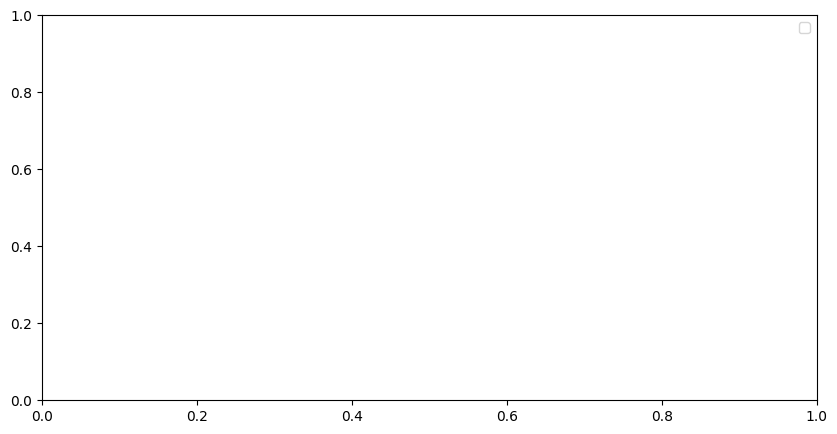

In [24]:
# Ex 3.6: For a given city and a range of dates (start and end):
#   - Make a line plot with the temperature reads of that city during the selected time period, the x axis has to be the timestamp column.
#   - Make a histogram of the temperature reads of that city during the selected time period.
#   - Make sure that all plots include a title, axis labels and a legend.

city = "Munich"
start_date = pd.to_datetime("2008-01-01").date()
end_date = pd.to_datetime("2010-12-31").date()

city_df = [temps_df['City'] == Munich]          # TODO: get a dataframe with the rows of the selected city

city_df_period = None   # TODO: get a dataframe with the rows of the selected city and the selected period of time using the Date column and any of the <, >, <=, >= operators to compare with start_date and end_date

plt.figure(figsize=(10, 5))

# TODO: Uncomment and complete the following lines to plot the line plot using the city_df_period AvgTemperatureCelsius column as the y axis and the Date column as the x axis

# plt.plot()    # TODO
# plt.title()   # TODO
# plt.xlabel()  # TODO
# plt.ylabel()  # TODO
plt.legend()

plt.show()


In [ ]:
# TODO: Build the histogram plot using the city_df_period AvgTemperatureCelsius column as the data to plot

plt.figure(figsize=(10, 5))

# plt.hist()    # TODO: use the city_df_period AvgTemperatureCelsius column as the data to plot, you can use the parameter bins=20
# plt.title()   # TODO
# plt.xlabel()  # TODO
# plt.ylabel()  # TODO

plt.show()

In [ ]:
# Ex 3.7: Now repeat the previous question but for a list of cities:
#   - Make a line plot with the temperature reads of the cities in the list, for the selected time period, every city has to be a different line with a different color, the x axis has to be the timestamp column.
#   - Make a histogram of the temperature reads of a list of selected cities, for the selected time period, every city has to be its own distribution with a different color.
#   - Make sure that all plots include a title, axis labels and a legend.

selected_cities = ["Munich", "Buenos Aires", "Tokyo"]
start_date = pd.to_datetime("2008-01-01").date()
end_date = pd.to_datetime("2010-12-31").date()


plt.figure(figsize=(15, 5))

# TODO: Uncomment and complete the following lines to plot the line plot using the city_df_period AvgTemperatureCelsius column as the y axis and the Date column as the x axis

# for city in selected_cities:
#     city_df = None            # TODO: get a dataframe with the rows of the selected city
#     city_df_period = None     # TODO: get a dataframe with the rows of the selected city and the selected period of time using the Date column and any of the <, >, <=, >= operators to compare with start_date and end_date
#     plt.plot()                # TODO plot each city line and use the label parameter to set the legend name for each city

# plt.title()   # TODO
# plt.xlabel()  # TODO
# plt.ylabel()  # TODO

plt.legend()

plt.show()

In [ ]:
# TODO: Build the histogram plot for the selected cities using the city_df_period AvgTemperatureCelsius column as the data to plot for each one

plt.figure(figsize=(15, 5))

# for city in selected_cities:
#     city_df = None            # TODO: get a dataframe with the rows of the selected city
#     city_df_period = None     # TODO: get a dataframe with the rows of the selected city and the selected period of time using the Date column and any of the <, >, <=, >= operators to compare with start_date and end_date
#     plt.hist()                    # TODO: plot each city histogram in the same plot and use the label parameter to set the legend name for each city 

# plt.title()   # TODO
# plt.xlabel()  # TODO
# plt.ylabel()  # TODO

plt.legend()

plt.show()
